In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [2]:
# Create 3 series of samples
samples = 100
a_id = ['a' for i in range(samples)]
a_att1 = ([np.round(np.random.uniform(3, 8),3) for i in range(samples)])
a_att2 = [1 for i in range(samples)]
b_id = ['b' for i in range(samples)]
b_att1 = ([np.round(np.random.uniform(4, 9),3) for i in range(samples)])
b_att2 = [2 for i in range(samples)]
c_id = ['c' for i in range(samples)]
c_att1 = ([np.round(np.random.uniform(2, 5),3) for i in range(samples)])
c_att2 = [3 for i in range(samples)]
ids = a_id + b_id + c_id
att1s = a_att1 + b_att1 + c_att1
att2s = a_att2 + b_att2 + c_att2

In [3]:
# Create Panda DataFrame with first two columns
df = pd.DataFrame({'id': ids, 'att1': att1s}) 
# Insert another column
df['att2'] = att2s

In [4]:
# Inspect data frame
df

,id,att1,att2
0,a,4.832,1
1,a,5.074,1
2,a,5.862,1
3,a,5.668,1
4,a,4.395,1
...,...,...,...
295,c,4.383,3
296,c,3.593,3
297,c,2.260,3
298,c,4.240,3


In [5]:
# Write Data Frame to CSV
df.to_csv('randomSamples.csv', encoding='utf-8', index=False)

In [6]:
# Read Data Frame from CSV
df1 = pd.DataFrame(pd.read_csv('randomSamples.csv'))

In [7]:
# Rename column from att1 to attr1
df1.rename(columns = {'att1': 'attr1'}, inplace = True)

# Select desired columns (dropping att2)
df2 = df1[['id','attr1']]

# Remove 'id:c' samples
remove = False
if remove:
    df3 = df2[df2.id != 'c']
else:
    df3 = df2


# Group data frame by 'id' column
dfg = df3.groupby(df3.id)
keys = list(dfg.groups.keys())

In [8]:
# Show statistics for each queryName engineExecutionTimeInMillis
for key in keys:
    print("\n" + key)
    print(dfg.get_group(key)['attr1'].describe())


a
count    100.000000
mean       5.502450
std        1.323296
min        3.107000
25%        4.392000
50%        5.458500
75%        6.479500
max        7.928000
Name: attr1, dtype: float64

b
count    100.000000
mean       6.217940
std        1.591895
min        4.034000
25%        4.811250
50%        5.950000
75%        7.721750
max        8.982000
Name: attr1, dtype: float64

c
count    100.000000
mean       3.511750
std        0.832322
min        2.029000
25%        2.848250
50%        3.459000
75%        4.246000
max        4.982000
Name: attr1, dtype: float64


a         AxesSubplot(0.1,0.15;0.235294x0.75)
b    AxesSubplot(0.382353,0.15;0.235294x0.75)
c    AxesSubplot(0.664706,0.15;0.235294x0.75)
dtype: object

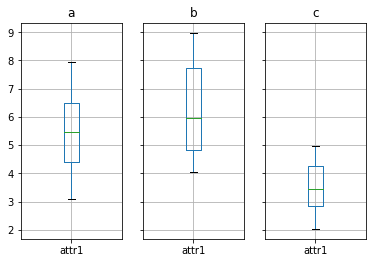

In [9]:
# Quick boxplot
dfg.boxplot(layout=(1,len(keys)))

id
a    [[AxesSubplot(0.125,0.670278;0.775x0.209722)],...
b    [[AxesSubplot(0.125,0.670278;0.775x0.209722)],...
c    [[AxesSubplot(0.125,0.670278;0.775x0.209722)],...
dtype: object

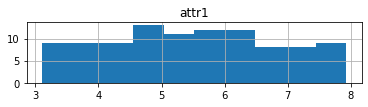

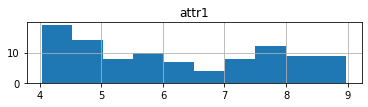

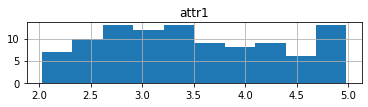

In [10]:
# Quick histogram
dfg.hist(layout=(len(keys),1))

Text(0, 0.5, 'Attr1')

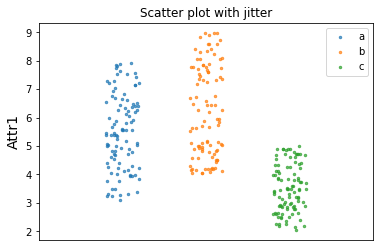

In [11]:
ax = plt.figure().gca()
ax.xaxis.set_ticklabels([])
ax.xaxis.set_visible(False)
plt.xlim(0, len(keys) + 1)
size = 6

x = 1 
for key in keys:
    serie = dfg.get_group(key)['attr1'].tolist()
    serie_jitter = [np.random.uniform(x-0.2,x+0.2) for i in serie]
    plt.scatter(serie_jitter, serie, label=key, s=size, alpha=0.7)
    x += 1
    
plt.legend(loc='upper right')
plt.title("Scatter plot with jitter")
plt.ylabel("Attr1", size=14)